## Extract FLASH Data in yt
Mirielle Wong

6/21/24

Use yt's covering_grid class to extract data from FLASH.

In [17]:
# https://yt-project.org/

import yt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

In [18]:
# plot_path = "./OSIRIS_transfer/MAGOFF/MagShockZ_hdf5_plt_cnt_0004"
plot_path = "./OSIRIS_transfer/MAGON/MagShockZ_hdf5_chk_0005"

In [19]:
ds = yt.load(plot_path)

yt : [INFO     ] 2024-07-17 10:22:04,547 Particle file found: MagShockZ_hdf5_chk_0005
yt : [INFO     ] 2024-07-17 10:22:04,587 Parameters: current_time              = 1.8520020414484505e-09
yt : [INFO     ] 2024-07-17 10:22:04,588 Parameters: domain_dimensions         = [288 272 288]
yt : [INFO     ] 2024-07-17 10:22:04,588 Parameters: domain_left_edge          = [-0.6   -0.075 -0.6  ]
yt : [INFO     ] 2024-07-17 10:22:04,589 Parameters: domain_right_edge         = [0.6 1.  0.6]
yt : [INFO     ] 2024-07-17 10:22:04,589 Parameters: cosmological_simulation   = 0


In [20]:
list(ds.fields.flash)

[On-Disk Field ('flash', 'absr'): (units: '', display_name: 'Absorption Coefficient'),
 On-Disk Field ('flash', 'cham'): (units: '', display_name: 'Chamber Material Fraction'),
 On-Disk Field ('flash', 'cond'): (units: '', display_name: 'Conductivity'),
 On-Disk Field ('flash', 'dbgs'): (units: '', display_name: 'Debug for Shocks'),
 On-Disk Field ('flash', 'dens'): (units: 'code_mass/code_length**3'),
 On-Disk Field ('flash', 'depo'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'dfcf'): (units: '', display_name: 'Diffusion Equation Scalar'),
 On-Disk Field ('flash', 'divb'): (units: 'code_magnetic/code_length'),
 On-Disk Field ('flash', 'eele'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Electron Internal Specific Energy'),
 On-Disk Field ('flash', 'eint'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'eion'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Ion Internal Specific Energy'),
 On-Disk Field ('

In [21]:
print(ds.domain_dimensions)
domain_left_edge = [-0.6, -0.075, -0.6]    # from info printed in yt.load

[288 272 288]


In [22]:
# this is from the yt documentation

level = 2
dims = ds.domain_dimensions * ds.refine_by**level

# We construct an object that describes the data region and structure we want
# In this case, we want all data up to the maximum "level" of refinement
# across the entire simulation volume.  Higher levels than this will not
# contribute to our covering grid.
all_data = ds.covering_grid(
    level,
    left_edge=domain_left_edge,
    dims=dims,
    # And any fields to preload (this is optional!)
)

In [23]:
# relevant vars

print(ds.units)
print(ds.length_unit)
print(ds.mass_unit)
print(dims)
print(ds.domain_dimensions)
print(ds.refine_by)

1.0 cm
1.0 g
[1152 1088 1152]
[288 272 288]
2


In [24]:
data_level0 = ds.covering_grid(
    1,
    left_edge=domain_left_edge,
    dims=ds.domain_dimensions
)

In [25]:
# check shape

print(data_level0['flash', 'vely'][:, :, 0].shape)
print(data_level0['index', 'cell_volume'].shape)

(288, 272)
(288, 272, 288)


In [26]:
# we can create a df for any any field in ds.fields.flash
ye = pd.DataFrame(data_level0['flash', 'ye'][:, :, 0]) # why is this taking the zeroth index?
tion = pd.DataFrame(data_level0['flash', 'tion'][:, :, 0])

In [27]:
density = pd.DataFrame(data_level0['flash', 'dens'][:, :, -1])
trad = pd.DataFrame(data_level0['flash', 'trad'][:, :, -1])

cell_volume = pd.DataFrame(data_level0['index', 'cell_volume'][:,:,-1])
density.head

<bound method NDFrame.head of        0      1      2      3      4      5      6      7      8      9    \
0    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
1    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
2    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
3    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
4    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
283  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
284  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
285  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
286  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
287  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   

     ...       262       263       264       

In [59]:
slc = yt.SlicePlot(ds,"z",("magz"))
# slc.annotate_streamlines(("vely"), ("velz"))
slc.save()

yt : [INFO     ] 2024-07-17 11:35:46,534 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-17 11:35:46,534 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-17 11:35:46,537 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-17 11:35:46,538 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-17 11:35:46,539 Making a fixed resolution buffer of (('flash', 'magz')) 800 by 800


yt : [INFO     ] 2024-07-17 11:35:46,970 Saving plot MagShockZ_hdf5_chk_0005_Slice_z_magz.png


['MagShockZ_hdf5_chk_0005_Slice_z_magz.png']

yt : [INFO     ] 2024-07-17 15:53:52,799 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-17 15:53:52,800 ylim = -0.075000 1.000000


yt : [INFO     ] 2024-07-17 15:53:52,803 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-17 15:53:52,804 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-17 15:53:52,806 Making a fixed resolution buffer of (('flash', 'magx')) 800 by 800



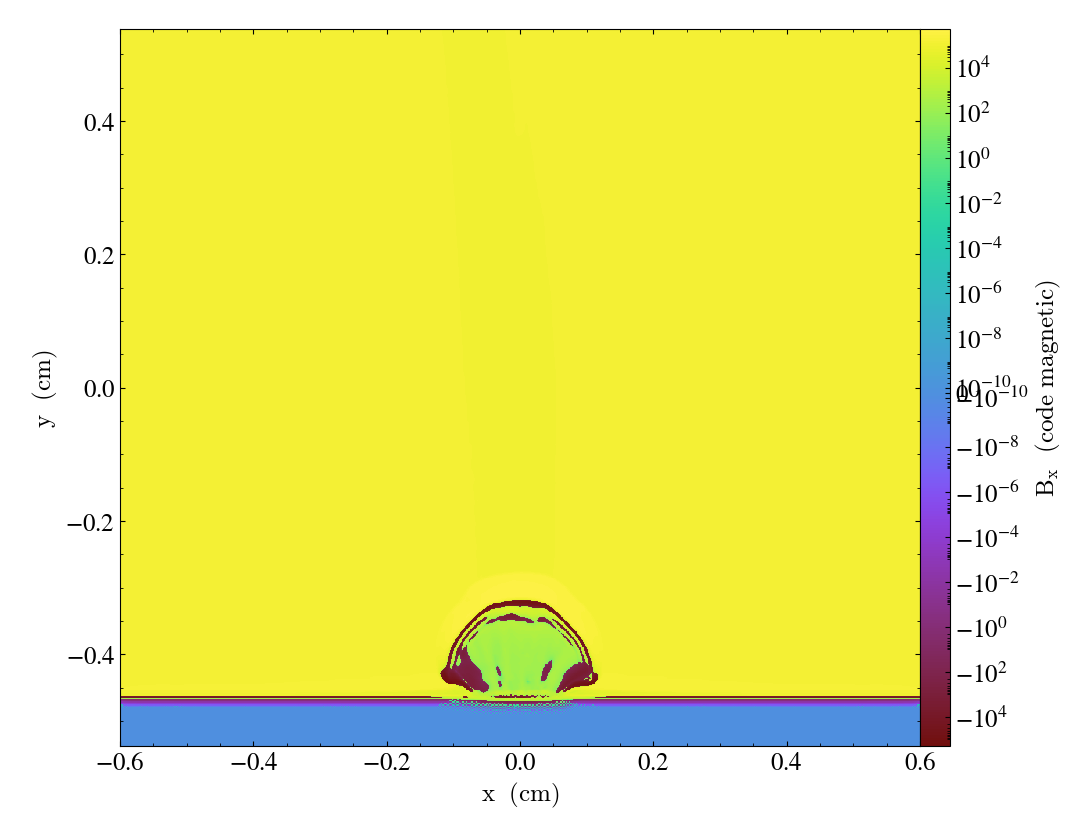

In [67]:
prj = yt.SlicePlot(ds,'z','magx')
prj

yt : [INFO     ] 2024-07-17 15:54:58,450 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-17 15:54:58,451 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-17 15:54:58,454 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-17 15:54:58,454 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-17 15:54:58,456 Making a fixed resolution buffer of (('flash', 'magx')) 800 by 800


magx at [0.  0.2 0. ] code_length: [110120.68817938] code_magnetic



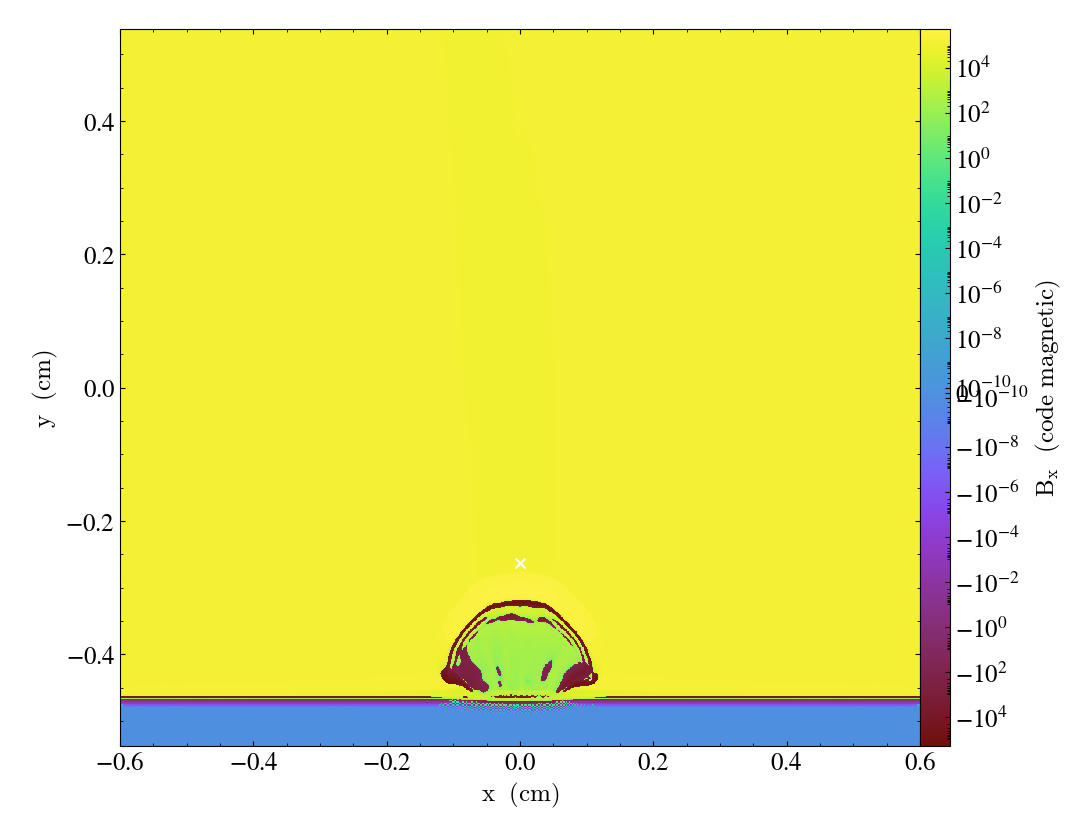

In [71]:
def pull_value_at_coord(x, y, z, field):
    slc = yt.SlicePlot(ds,"z",(field))
    
    # Convert coordinates to dataset units
    coord = ds.arr([x, y, z], 'code_length')

    # Extract the value at the specific coordinates
    value = ds.find_field_values_at_point(fields=('flash',field), coords=coord)
    print(f"{field} at {coord}: {value}")

    slc.annotate_marker(coord)
    return slc

slc_new = pull_value_at_coord(0.0,0.2,0.0,'magx')
slc_new

In [62]:
plot = yt.LinePlot(ds, [("flash", "magz")], (0, 0.015, 0), (0, .8, 0), 50000)
plot.set_log(("flash", "magz"),log = False)
plot
plot.save()

yt : [INFO     ] 2024-07-17 11:37:12,009 Saving plot MagShockZ_hdf5_chk_0005_line_plot_magz.png


['MagShockZ_hdf5_chk_0005_line_plot_magz.png']

In [36]:
ray = ds.ray((0, 0.015, 0), (0, .2, 0))

dens = np.array(ray[('flash','dens')])
y = np.array(ray[('flash','y')])

from lmfit import Model

def model(t, A, alpha, C):
    return A * np.exp(-alpha * t)  + C

# Create a model
exp_model = Model(model)

# Initial guess for the parameters
params = exp_model.make_params(A=0.005, alpha=1.0, B=0.0, beta=0.1, C=0.0, t0 = 0.15)

# Perform the fit
result = exp_model.fit(dens, params, t=y)


[[Model]]
    Model(model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 95
    # variables        = 3
    chi-square         = 1.8284e-06
    reduced chi-square = 1.9874e-08
    Akaike info crit   = -1681.76327
    Bayesian info crit = -1674.10163
    R-squared          = 0.98091902
[[Variables]]
    A:      0.00639797 +/- 1.7002e-04 (2.66%) (init = 0.005)
    alpha:  30.6835380 +/- 1.01256474 (3.30%) (init = 1)
    C:      1.0585e-04 +/- 2.5029e-05 (23.65%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, alpha) = +0.8370
    C(alpha, C) = +0.7000
    C(A, C)     = +0.3564


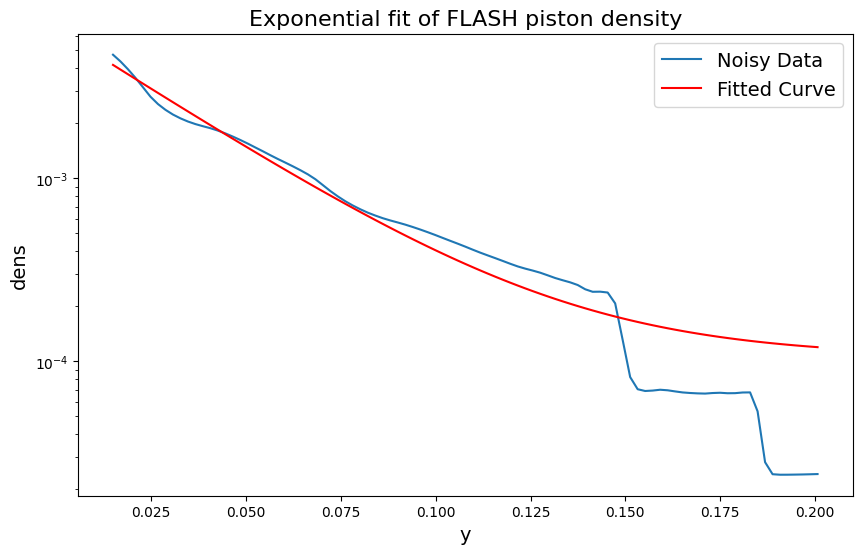

In [42]:
print(result.fit_report())

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.xlabel('y', fontsize=14)
plt.ylabel('dens', fontsize=14)
plt.ylabel('dens')
plt.title('Exponential fit of FLASH piston density')
plt.semilogy(y, dens, label='Noisy Data')
plt.semilogy(y, result.best_fit, color='red', label='Fitted Curve')
plt.legend(fontsize=14)
plt.xlabel('y', fontsize=14)
plt.ylabel('dens', fontsize=14)
plt.title('Exponential fit of FLASH piston density', fontsize=16)
plt.show()

